In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.drop(["who","embarked","class","sibsp","adult_male","alive","alone"],axis=1,inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
print(df.isnull().values.any())

True


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
parch            0
fare             0
deck           688
embark_town      2
dtype: int64

In [9]:
import missingno as msno

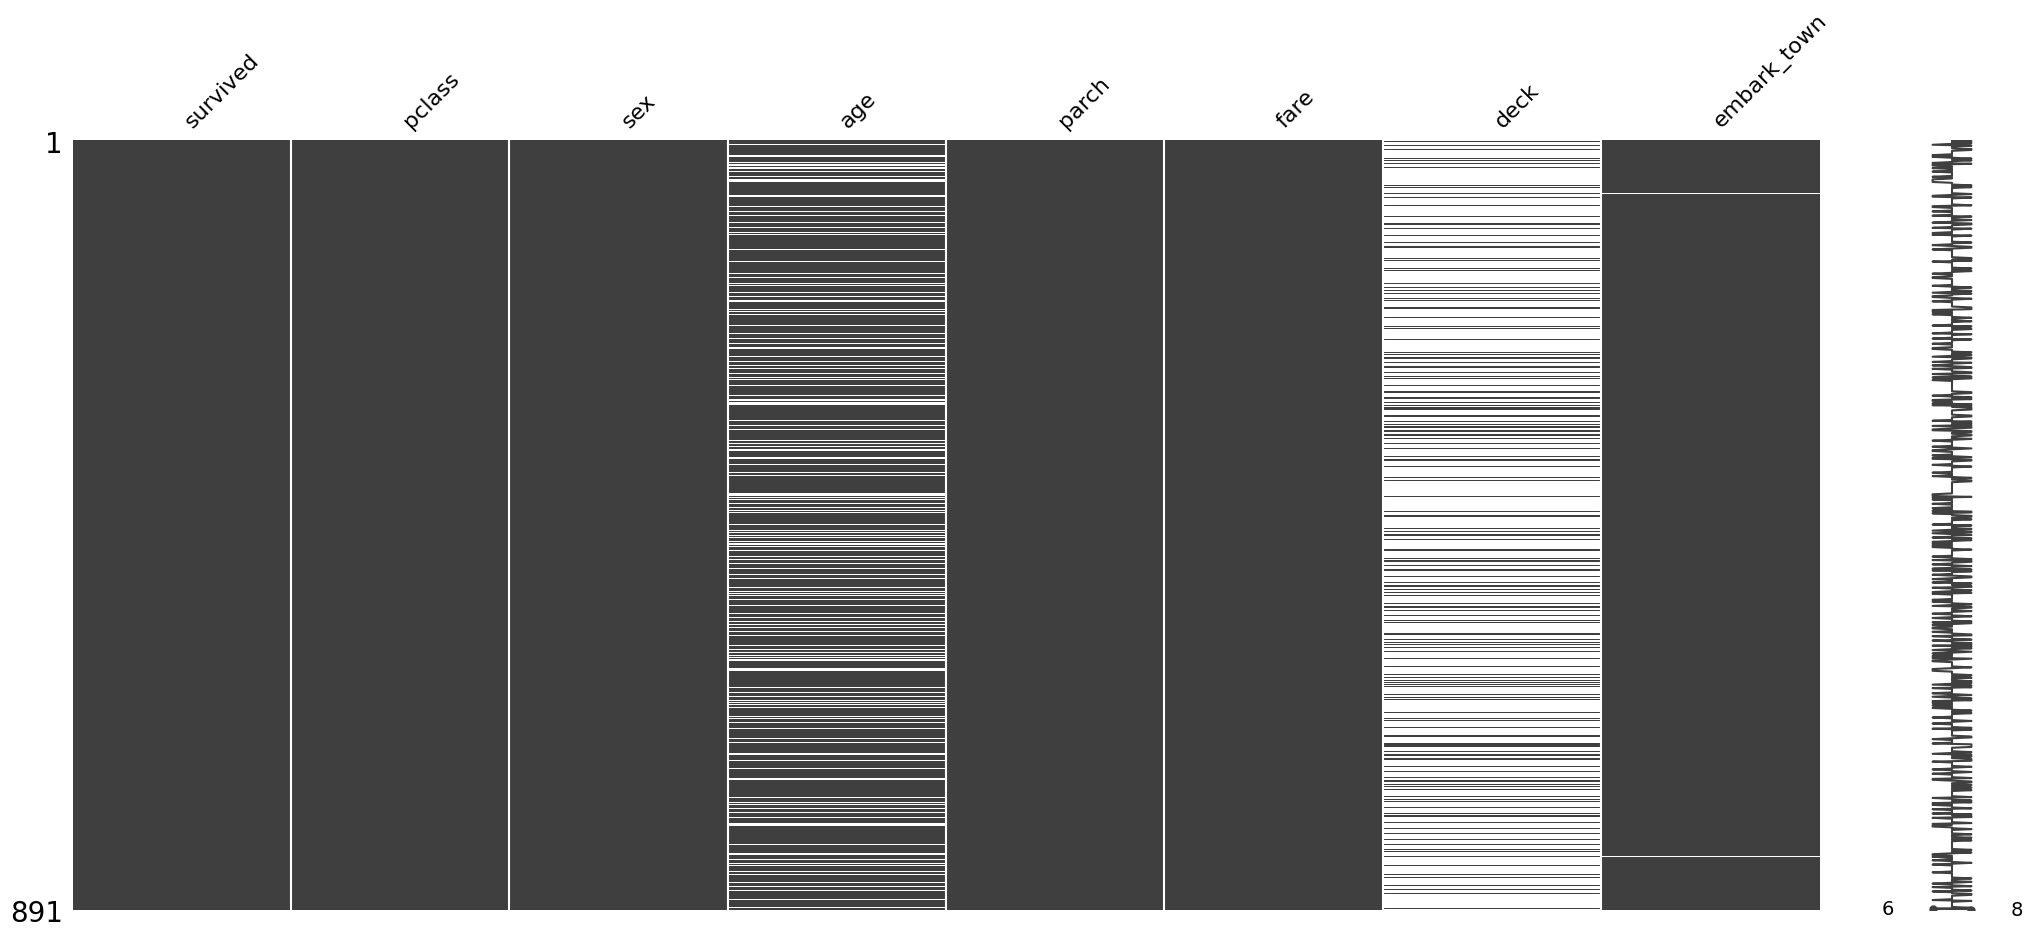

In [10]:
msno.matrix(df);

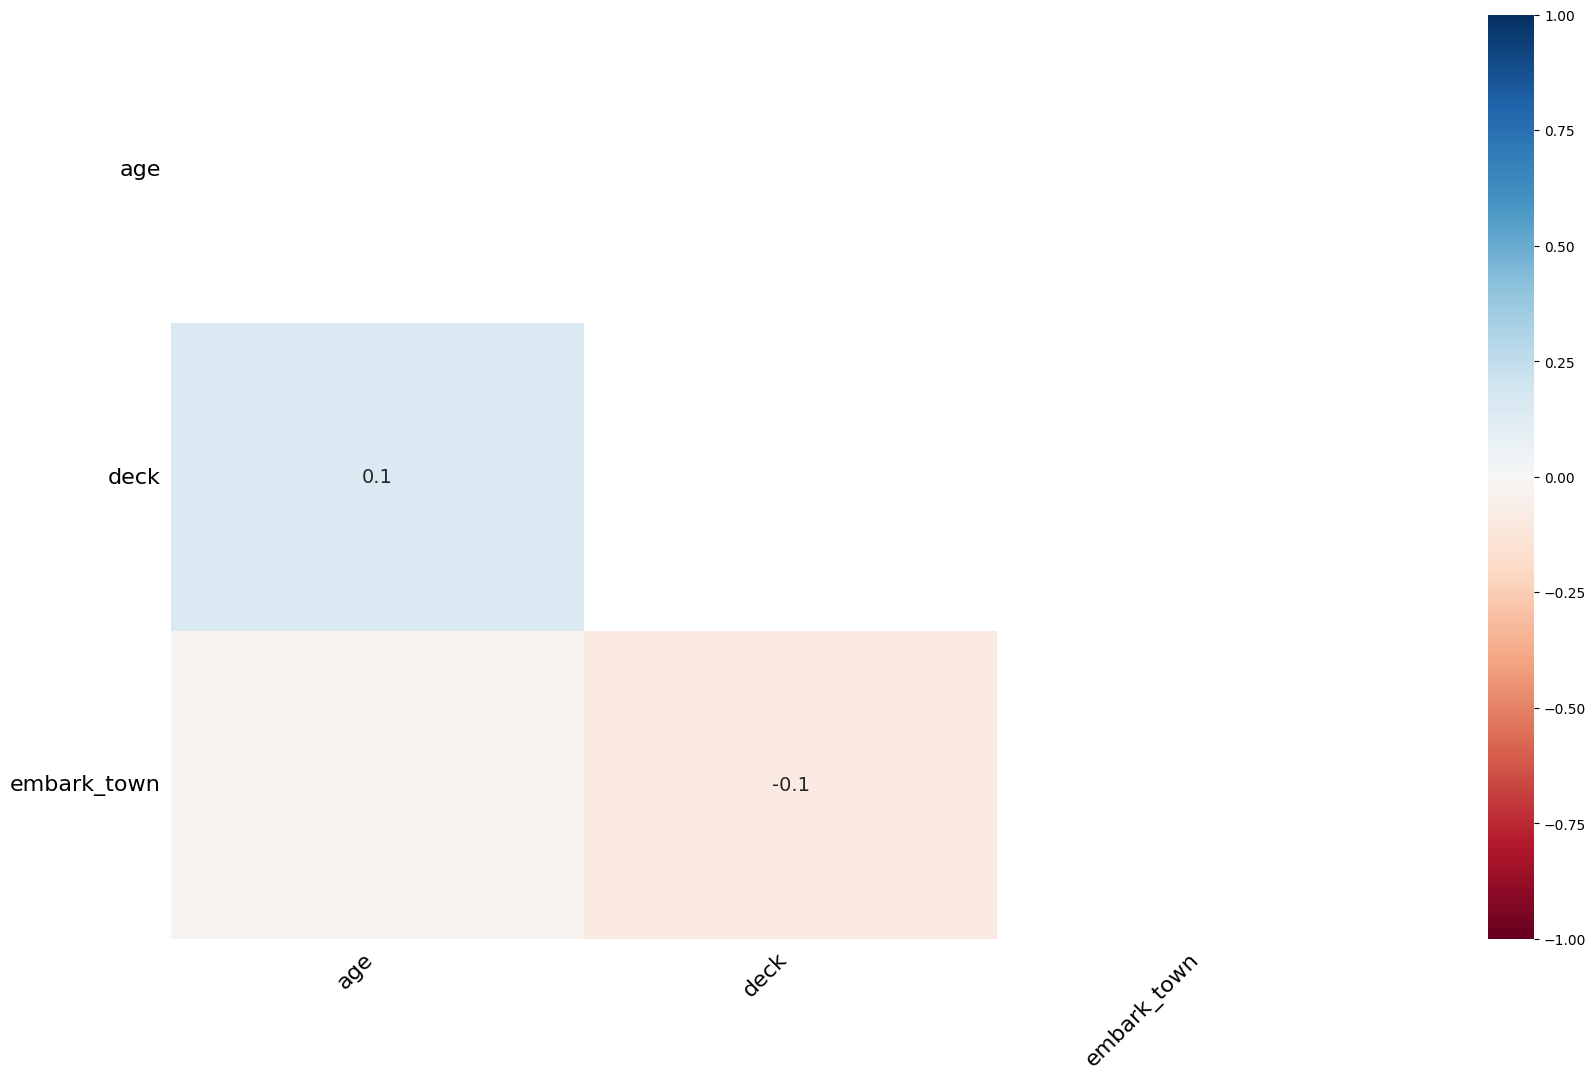

In [11]:
msno.heatmap(df);

In [12]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
df["embark_town"].fillna("Southampton",inplace=True)

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
parch            0
fare             0
deck           688
embark_town      0
dtype: int64

In [16]:
df['age'] = df['age'].fillna(df.groupby(['pclass', 'sex'])['age'].transform("mean"))
df['age'] = df['age'].fillna(df['age'].mean())

In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
parch            0
fare             0
deck           688
embark_town      0
dtype: int64

In [18]:
df["deck"].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [19]:
df['deck'] = df['deck'].fillna("C")

In [20]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
parch          0
fare           0
deck           0
embark_town    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])

In [23]:
df.head()

,survived,pclass,sex,age,parch,fare,deck,embark_town
0,0,3,1,22.0,0,7.2500,C,Southampton
1,1,1,0,38.0,0,71.2833,C,Cherbourg
2,1,3,0,26.0,0,7.9250,C,Southampton
3,1,1,0,35.0,0,53.1000,C,Southampton
4,0,3,1,35.0,0,8.0500,C,Southampton


In [24]:
y=["embark_town"]
df=pd.get_dummies(df,columns=y,dtype=int,drop_first=True)

In [25]:
y=["deck"]
df=pd.get_dummies(df,columns=y,dtype=int,drop_first=True)

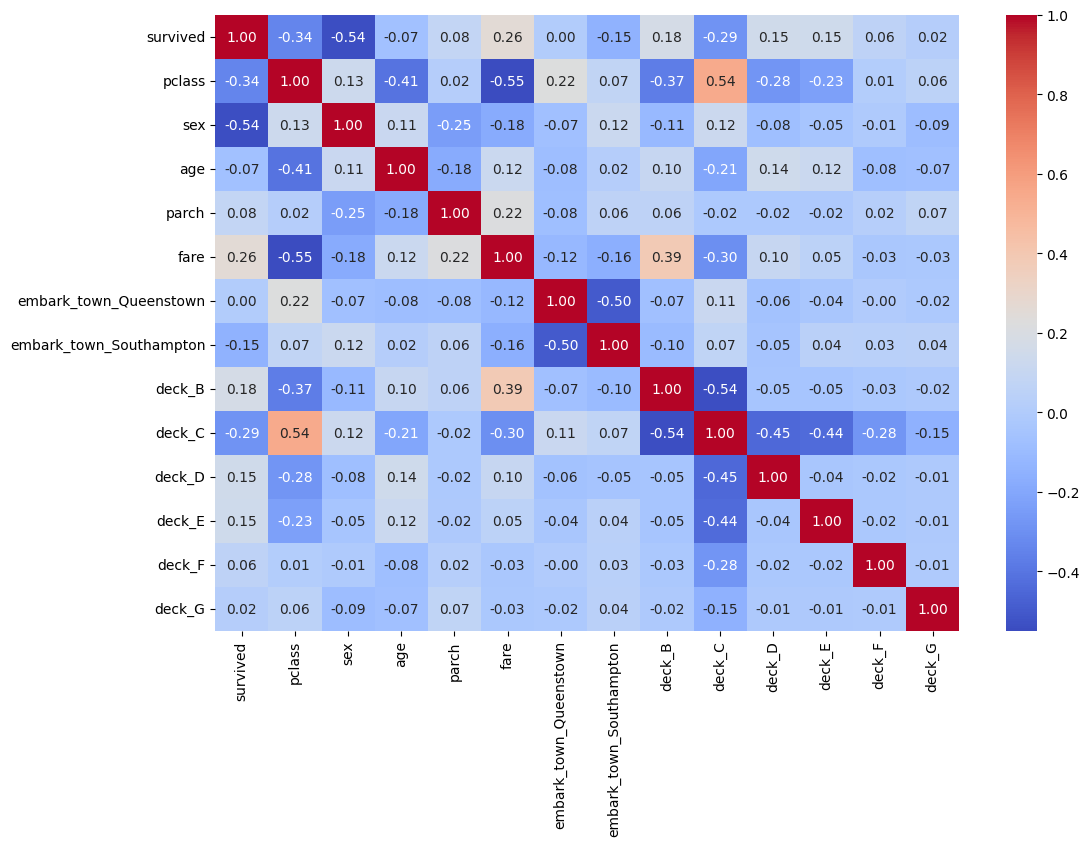

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm");

In [27]:
df=df.drop(["deck_B","deck_C","deck_D","deck_E"],axis=1)

In [28]:
df.head()

,survived,pclass,sex,age,parch,fare,embark_town_Queenstown,embark_town_Southampton,deck_F,deck_G
0,0,3,1,22.0,0,7.2500,0,1,0,0
1,1,1,0,38.0,0,71.2833,0,0,0,0
2,1,3,0,26.0,0,7.9250,0,1,0,0
3,1,1,0,35.0,0,53.1000,0,1,0,0
4,0,3,1,35.0,0,8.0500,0,1,0,0


In [29]:
import pylab
from scipy import stats

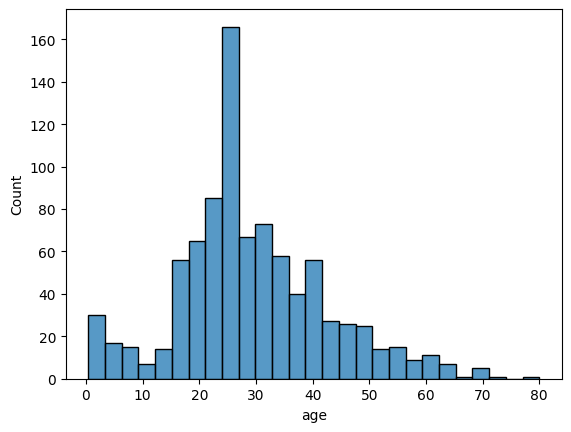

In [30]:
sns.histplot(df["age"]);

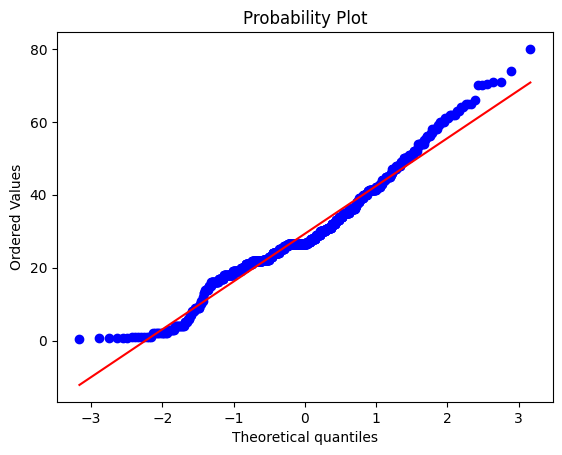

In [31]:
stats.probplot(df["age"],dist="norm",plot=pylab)
pylab.show()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
df["age"]=scaler.fit_transform(df[["age"]])

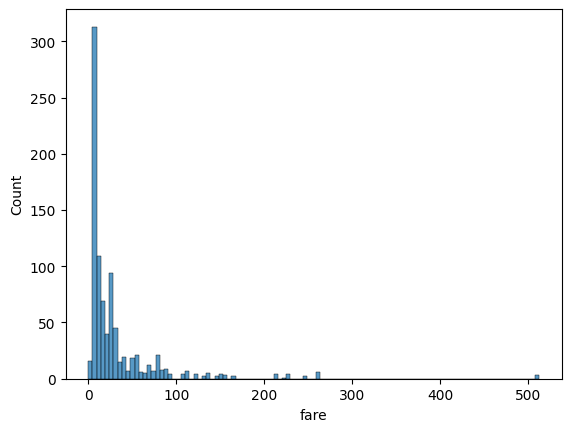

In [34]:
sns.histplot(df["fare"]);

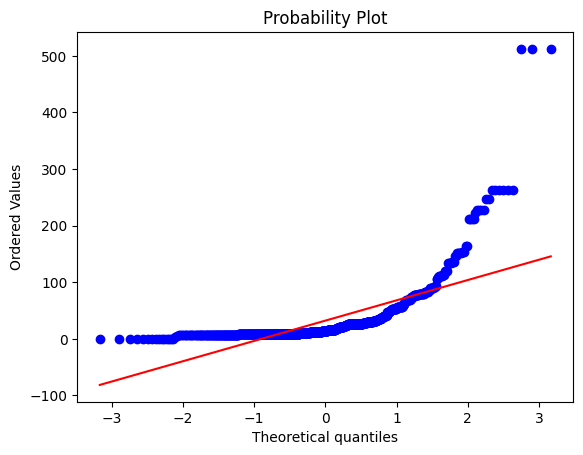

In [35]:
stats.probplot(df["fare"],dist="norm",plot=pylab)
pylab.show()

In [36]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
df[['fare']] = r_scaler.fit_transform(df[['fare']])

In [37]:
df.head()

,survived,pclass,sex,age,parch,fare,embark_town_Queenstown,embark_town_Southampton,deck_F,deck_G
0,0,3,1,-0.551366,0,-0.312011,0,1,0,0
1,1,1,0,0.654030,0,2.461242,0,0,0,0
2,1,3,0,-0.250017,0,-0.282777,0,1,0,0
3,1,1,0,0.428018,0,1.673732,0,1,0,0
4,0,3,1,0.428018,0,-0.277363,0,1,0,0


In [38]:
x=df.drop("survived",axis=1)
y=df["survived"]

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [41]:
import statsmodels.api as sm
loj=sm.Logit(y_train,x_train)
model=loj.fit()

Optimization terminated successfully.
         Current function value: 0.505110
         Iterations 6


In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Aug 2025   Pseudo R-squ.:                  0.2340
Time:                        20:53:14   Log-Likelihood:                -314.68
converged:                       True   LL-Null:                       -410.79
Covariance Type:            nonrobust   LLR p-value:                 2.789e-37
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
pclass                      0.1050      0.103      1.015      0.310      -0.098       0.308
sex                        -2.0672      0.209     -9.868      0.000      -2.478      -1.657
age                        -0.1472      0.110     -1.344      0.179      -0.362       0.067
parch                      -0.2416      0.130     -1.859      0.063      -0.496       0.013
fare                        0.3768      0.074      5.103      0.000       0.232       0.521
embark_town_Queenstown      0.2269      0.409      0.554      0.579      -0.576       1.029
embark_town_Southampton     0.1678      0.258      0.651      0.515      -0.337       0.673
deck_F                      1.5353      0.695      2.211      0.027       0.174       2.897
deck_G                     -0.9489      1.245     -0.762      0.446      -3.389       1.491
===========================================================================================
"""

In [43]:
X_train=x_train[["sex","fare","deck_F"]]
X_test=x_test[["sex","fare","deck_F"]]

In [44]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
model=loj.fit(X_train,y_train)

In [45]:
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,model.predict(X_test))

0.7798507462686567

In [47]:
cross_val_score(model,X_test,y_test,cv=10).mean()

0.7914529914529914

In [48]:
loj_accuracy=accuracy_score(y_test,model.predict(X_test))
loj_accuracy_cv=cross_val_score(model,X_test,y_test,cv=10).mean()

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nb_model=GaussianNB().fit(X_train,y_train)

In [53]:
accuracy_score(y_test,nb_model.predict(X_test))

0.7835820895522388

In [54]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.7237891737891738

In [55]:
nb_accuracy=accuracy_score(y_test,nb_model.predict(X_test))
nb_accuracy_cv=cross_val_score(nb_model,X_test,y_test,cv=10).mean()

In [56]:
print(classification_report(y_test,nb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.74      0.74      0.74       111

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn_model=KNeighborsClassifier().fit(X_train,y_train)

In [59]:
accuracy_score(y_test,knn_model.predict(X_test))

0.7350746268656716

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
knn_params={'n_neighbors':np.arange(1,50)}

In [62]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,knn_params,cv=10)

In [63]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [64]:
knn_cv.best_params_

{'n_neighbors': 18}

In [65]:
knn_cv.best_score_

0.7865079365079365

In [66]:
knn_tuned_model=KNeighborsClassifier(18).fit(X_train,y_train)

In [67]:
accuracy_score(y_test,knn_tuned_model.predict(X_test))

0.7723880597014925

In [68]:
knn_tuned_acc=accuracy_score(y_test,knn_tuned_model.predict(X_test))

In [69]:
print(classification_report(y_test,knn_tuned_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       157
           1       0.76      0.66      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [70]:
from sklearn.svm import SVC

In [71]:
svm_model_lin=SVC(kernel='linear').fit(X_train,y_train)

In [72]:
accuracy_score(y_test,svm_model_lin.predict(X_test))

0.7910447761194029

In [73]:
svm=SVC(kernel='linear')
svm_params={'C':np.arange(1,10)}
svm_cv=GridSearchCV(svm,svm_params,cv=10,n_jobs=-1,verbose=2)

In [74]:
svm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [75]:
svm_cv.best_params_

{'C': 1}

In [76]:
svm_tuned_model_lin=SVC(kernel='linear',C=1).fit(X_train,y_train)

In [77]:
accuracy_score(y_test,svm_tuned_model_lin.predict(X_test))

0.7910447761194029

In [78]:
svm_tuned_model_lin_acc=accuracy_score(y_test,svm_tuned_model_lin.predict(X_test))

In [79]:
print(classification_report(y_test,svm_tuned_model_lin.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [80]:
svm_model_rbf=SVC(kernel='rbf').fit(X_train,y_train)

In [81]:
accuracy_score(y_test,svm_model_rbf.predict(X_test))

0.7798507462686567

In [82]:
svm_params_rbf={'C':[0.0001,0.001,0.1,1,5,10,50,100],'gamma':[0.0001,0.001,0.1,1,5,10,50,100]}
svm_rbf=SVC()
svm_rbf_cv=GridSearchCV(svm_rbf,svm_params_rbf,cv=10,n_jobs=-1,verbose=2)

In [83]:
svm_rbf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [84]:
svm_rbf_cv.best_params_

{'C': 50, 'gamma': 0.1}

In [85]:
svm_model_tuned_rbf=SVC(C=50,gamma=0.1).fit(X_train,y_train)

In [86]:
accuracy_score(y_test,svm_model_tuned_rbf.predict(X_test))

0.7873134328358209

In [87]:
svm_tuned_rbf_acc=accuracy_score(y_test,svm_model_tuned_rbf.predict(X_test))

In [88]:
from sklearn.neural_network import MLPClassifier

In [89]:
mlp_model=MLPClassifier().fit(X_train,y_train)

In [90]:
accuracy_score(y_test,mlp_model.predict(X_test))

0.7835820895522388

In [91]:
mlp=MLPClassifier()
mlp_params={'alpha':[0.1,0.01,0.02,0.005,0.0001,0.00001],
           'hidden_layer_sizes':[(10,10,10),(100,100,100),(100,100),(3,5),(5,3)],
           'solver':['adam','sgd','lbfgs'],
           'activation':['relu','logistic']}
mlp_cv=GridSearchCV(mlp,mlp_params,cv=10,n_jobs=-1,verbose=2)

In [92]:
mlp_cv.fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             verbose=2)

In [93]:
mlp_cv.best_params_

{'activation': 'logistic',
 'alpha': 1e-05,
 'hidden_layer_sizes': (3, 5),
 'solver': 'lbfgs'}

In [94]:
mlp_tuned_model=MLPClassifier(activation='logistic',alpha=1e-5,hidden_layer_sizes=(3,5),solver='lbfgs').fit(X_train,y_train)

In [95]:
accuracy_score(y_test,mlp_tuned_model.predict(X_test))

0.7835820895522388

In [96]:
mlp_tuned_model_acc=accuracy_score(y_test,mlp_tuned_model.predict(X_test))

In [97]:
print(classification_report(y_test,mlp_tuned_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.80      0.64      0.71       111

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268



In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
cart_model=DecisionTreeClassifier().fit(X_train,y_train)

In [100]:
accuracy_score(y_test,cart_model.predict(X_test))

0.7910447761194029

In [101]:
cart=DecisionTreeClassifier()
cart_params={'max_depth':range(1,10),'min_samples_split':list(range(2,50))}

In [102]:
cart_cv=GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2)
cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=2)

In [103]:
cart_cv.best_params_

{'max_depth': 9, 'min_samples_split': 21}

In [104]:
cart_model_tuned=DecisionTreeClassifier(max_depth=9,min_samples_split=21).fit(X_train,y_train)

In [105]:
accuracy_score(y_test,cart_model_tuned.predict(X_test))

0.7723880597014925

In [106]:
cart_model_tuned_acc=accuracy_score(y_test,cart_model_tuned.predict(X_test))

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [109]:
accuracy_score(y_test,rf_model.predict(X_test))

0.7835820895522388

In [110]:
rf=RandomForestClassifier()
rf_params={'max_depth':[2,5,8,10],'max_features':[2,5,8],'n_estimators':[10,500,1000],'min_samples_split':[2,5,10]}
rf_cv=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2)

In [111]:
rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [112]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [113]:
rf_model_tuned=RandomForestClassifier(max_depth=10,max_features=8,min_samples_split=2,n_estimators=500).fit(X_train,y_train)

In [114]:
accuracy_score(y_test,rf_model_tuned.predict(X_test))

0.8059701492537313

In [115]:
rf_model_tuned_acc=accuracy_score(y_test,rf_model_tuned.predict(X_test))

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

In [118]:
accuracy_score(y_test,gbm_model.predict(X_test))

0.8059701492537313

In [119]:
gbm=GradientBoostingClassifier()
gbm_params={'learning_rate':[0.001,0.01,0.1,0.05],'n_estimators':[100,500,1000],'max_depth':[3,5,10],'min_samples_split':[2,5,10]}
gbm_cv=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)

In [120]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [121]:
gbm_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [122]:
gbm_model_tuned=GradientBoostingClassifier(learning_rate=0.05,max_depth=3,min_samples_split=2,n_estimators=1000).fit(X_train,y_train)

In [123]:
accuracy_score(y_test,gbm_model_tuned.predict(X_test))

0.7835820895522388

In [124]:
gbm_model_tuned_acc=accuracy_score(y_test,gbm_model_tuned.predict(X_test))

In [125]:
from xgboost import XGBClassifier

In [126]:
xgb_model=XGBClassifier().fit(X_train,y_train)

In [127]:
accuracy_score(y_test,xgb_model.predict(X_test))

0.7873134328358209

In [128]:
xgb=XGBClassifier()
xgb_params={'n_estimators':[100,500,1000,2000],'subsample':[0.6,0.8,1.0],
            'max_depth':[3,4,5,6],'learning_rate':[0.1,0.01,0.02,0.05],'min_samples_split':[2,5,10]}
xgb_cv=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [129]:
xgb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [130]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 1.0}

In [131]:
xgb_model_tuned=XGBClassifier(learning_rate=0.1,max_depth=5,min_samples_split=2,n_estimators=1000,subsample=1.0).fit(X_train,y_train)

In [132]:
accuracy_score(y_test,xgb_model_tuned.predict(X_test))

0.7873134328358209

In [133]:
xgb_model_tuned_acc=accuracy_score(y_test,xgb_model_tuned.predict(X_test))

In [134]:
from lightgbm import LGBMClassifier

In [135]:
lgbm_model=LGBMClassifier(verbose=-1).fit(X_train,y_train)

In [136]:
accuracy_score(y_test,lgbm_model.predict(X_test))

0.8059701492537313

In [137]:
lgbm=LGBMClassifier()
lgbm_params={'n_estimators':[100,500,1000,2000],'subsample':[0.6,0.8,1.0],'max_depth':[3,4,5,6],
             'learning_rate':[0.1,0.01,0.02,0.05]}
lgbm_cv=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2)

In [138]:
lgbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [139]:
lgbm_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.6}

In [140]:
lgbm_tuned_model=LGBMClassifier(learning_rate=0.05,max_depth=4,n_estimators=1000,subsample=0.6,verbose=-1).fit(X_train,y_train)

In [141]:
accuracy_score(y_test,lgbm_tuned_model.predict(X_test))

0.8097014925373134

In [142]:
lgbm_tuned_model_acc=accuracy_score(y_test,lgbm_tuned_model.predict(X_test))

In [147]:
data={'Models':['Logistic Regression','Naive Bayes','KNeighbors','SVM Lineer','SVM Rbf','MLP','CART','Random Forest','GBM','XGBOOST','LGBM'],
     'Accuracy':[loj_accuracy_cv,nb_accuracy_cv,knn_tuned_acc,svm_tuned_model_lin_acc,svm_tuned_rbf_acc,mlp_tuned_model_acc,cart_model_tuned_acc,rf_model_tuned_acc,gbm_model_tuned_acc,xgb_model_tuned_acc,lgbm_tuned_model_acc]}

In [149]:
data=pd.DataFrame(data)

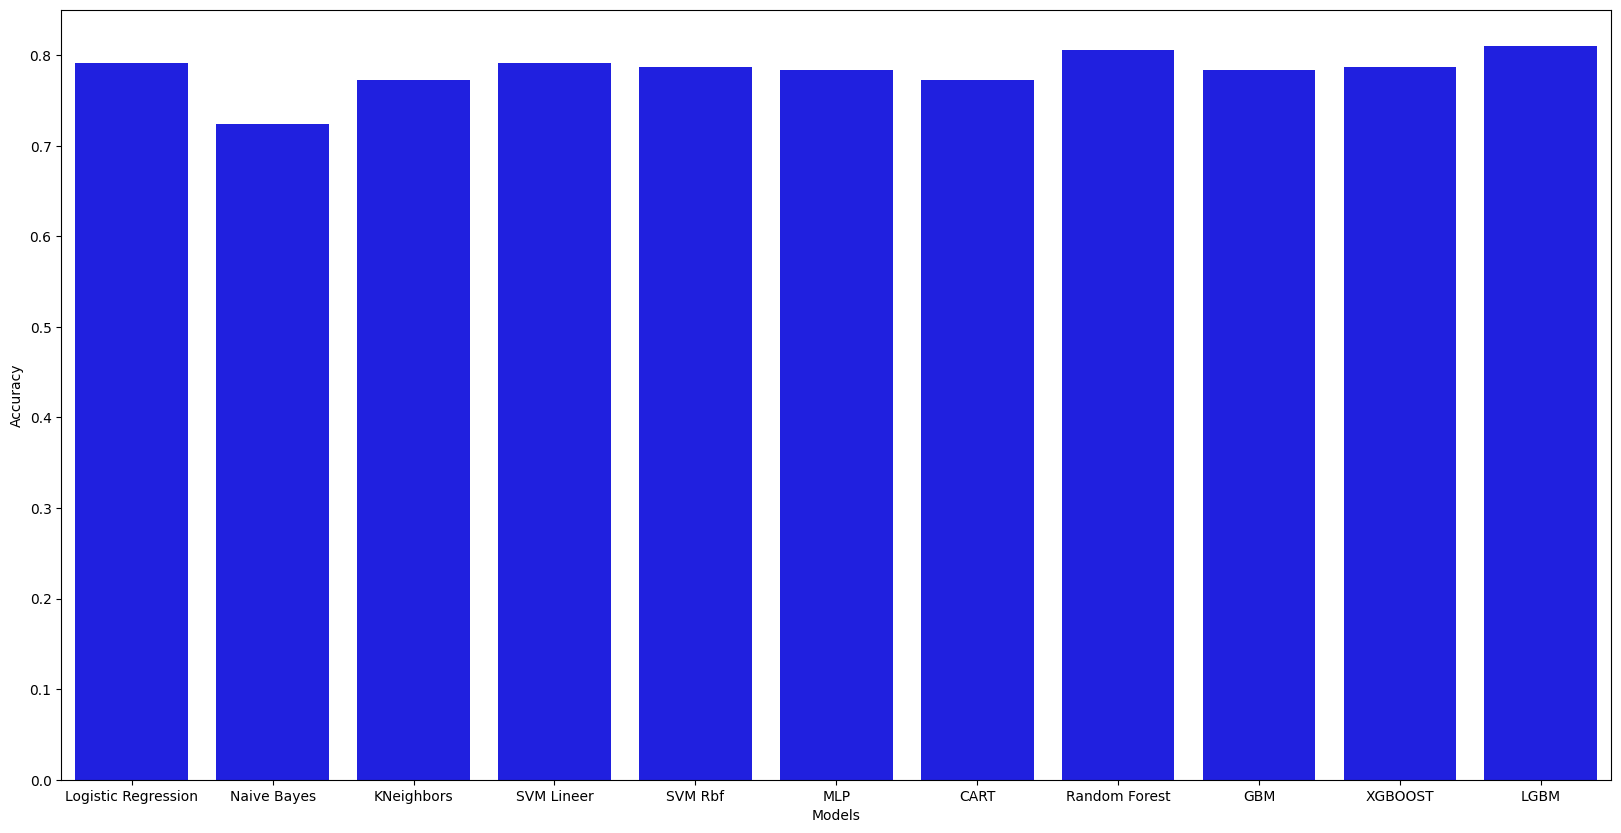

In [159]:
plt.figure(figsize=(20,10))
sns.barplot(x='Models',y='Accuracy',data=data,color='blue');